# We've tried finetuning. Let's see how we did.

In [1]:
%load_ext autoreload
%autoreload 2

from app.helpers.sequence_util import get_seq_ids_for_deep_mutational_scan
from app.helpers.finetuning.training import load_esm_model, score_sequences

In [2]:
import pandas as pd
import re

rubisco_wt_aa_seq = 'MDQSSRYVNLALKEEDLIAGGEHVLCAYIMKPKAGYGYVATAAHFAAESSTGTNVEVCTTDDFTRGVDALVYEVDEARELTKIAYPVALFDRNITDGKAMIASFLTLTMGNNQGMGDVEYAKMHDFYVPEAYRALFDGPSVNISALWKVLGRPEVDGGLVVGTIIKPKLGLRPKPFAEACHAFWLGGDFIKNDEPQGNQPFAPLRDTIALVADAMRRAQDETGEAKLFSANITADDPFEIIARGEYVLETFGENASHVALLVDGYVAGAAAITTARRRFPDNFLHYHRAGHGAVTSPQSKRGYTAFVHCKMARLQGASGIHTGTMGFGKMEGESSDRAIAYMLTQDEAQGPFYRQSWGGMKACTPIISGGMNALRMPGFFENLGNANVILTAGGGAFGHIDGPVAGARSLRQAWQAWRDGVPVLDYAREHKELARAFESFPGDADQIYPGWRKALGVEDTRSALPA'
rubisco_activity = pd.read_csv('notebooks/data/rubisco_activity.csv')
rubisco_activity = rubisco_activity.rename(columns={'mutant': 'seq_id', 'Fitness': 'activity'})[['seq_id', 'activity']]

tem1_activity = pd.read_excel('notebooks/data/tem1_activity.xlsx', sheet_name='simplified')
tem1_activity = tem1_activity.rename(columns={'Mutation': 'seq_id', 'activity_at_2500': 'activity'})[['seq_id', 'activity']]
def fix_tem1_seq_id(seq_id):
  m = re.match(r'([A-Z])(\d+)(.*)', seq_id)
  assert m, seq_id
  old_id = m.groups()[0]
  locus = int(m.groups()[1])
  new_id = m.groups()[2]

  new_locus = locus - 2
  
  if new_locus >= 245:
    new_locus = new_locus - 2

  return f'{old_id}{new_locus}{new_id}'
tem1_activity['seq_id'] = tem1_activity.seq_id.apply(fix_tem1_seq_id)


SignificanceResult(statistic=0.6527280623992772, pvalue=0.0)

Text(0.5, 1.0, 'ESM2-650M-0, Spearman: 0.65')

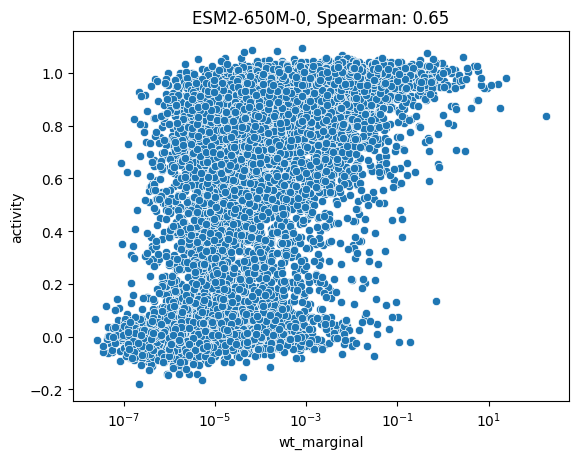

In [51]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/logits_rubisco_ESM2-650M_melted.csv')
combined_0_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')

sns.scatterplot(x='wt_marginal', y='activity', data=combined_0_df)
plt.xscale('log')
spearman = spearmanr(combined_0_df.wt_marginal, combined_0_df.activity)
plt.title(f'ESM2-650M-0, Spearman: {spearman.correlation:.2f}')

# 1 Paired Preference

Text(0.5, 1.0, 'ESM2-650M-1, Spearman: 0.655')

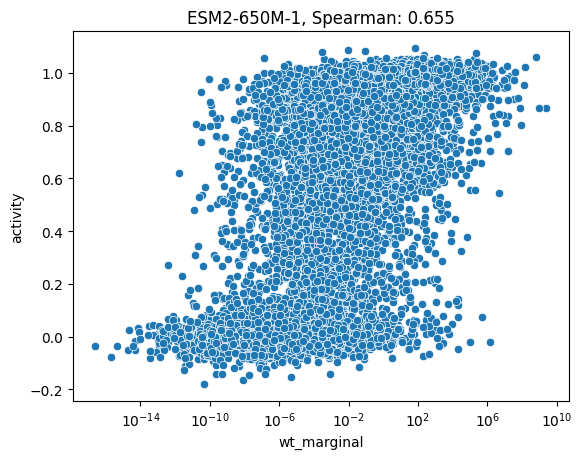

In [45]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/scores_1.csv')
frozen_scores['wt_marginal'] = frozen_scores['wt_marginal_score'].apply(lambda x: 10**x)
combined_1_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')
sns.scatterplot(x='wt_marginal', y='activity', data=combined_1_df)
plt.xscale('log')
spearman = spearmanr(combined_1_df.wt_marginal, combined_1_df.activity)
plt.title(f'ESM2-650M-1, Spearman: {spearman.correlation:.3f}')

# 10 Paired Preferences

Text(0.5, 1.0, 'ESM2-650M-10, Spearman: 0.653')

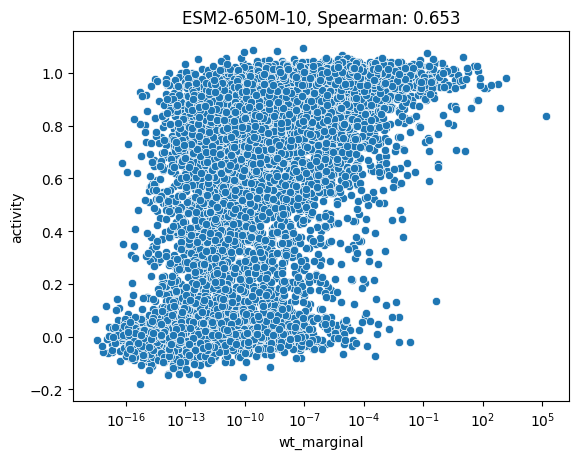

In [50]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/scores_ft650m10-0227_epochs=1.csv')
frozen_scores['wt_marginal'] = frozen_scores['wt_marginal_score'].apply(lambda x: 10**x)
combined_10_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')

sns.scatterplot(x='wt_marginal', y='activity', data=combined_10_df)
plt.xscale('log')
spearman = spearmanr(combined_10_df.wt_marginal, combined_10_df.activity)
plt.title(f'ESM2-650M-10, Spearman: {spearman.correlation:.3f}')

# 100 Paired Preferences

Text(0.5, 1.0, 'ESM2-650M-100, Spearman: 0.661')

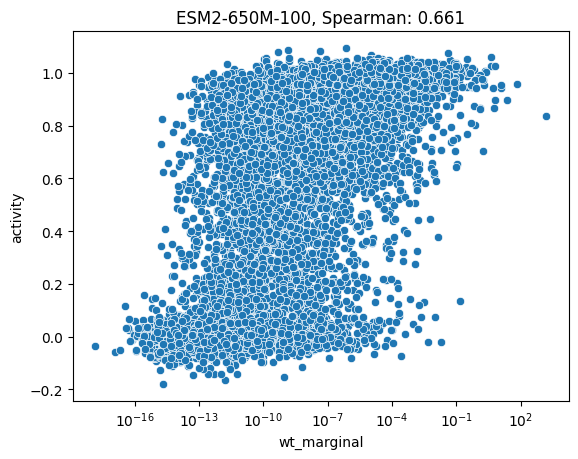

In [49]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/scores_ft650m100-0227_epochs=1.csv')
frozen_scores['wt_marginal'] = frozen_scores['wt_marginal_score'].apply(lambda x: 10**x)
combined_100_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')

sns.scatterplot(x='wt_marginal', y='activity', data=combined_100_df)
plt.xscale('log')
spearman = spearmanr(combined_100_df.wt_marginal, combined_100_df.activity)
plt.title(f'ESM2-650M-100, Spearman: {spearman.correlation:.3f}')

# 1000 Paired Preferences

Text(0.5, 1.0, 'ESM2-650M-1000, Spearman: 0.655')

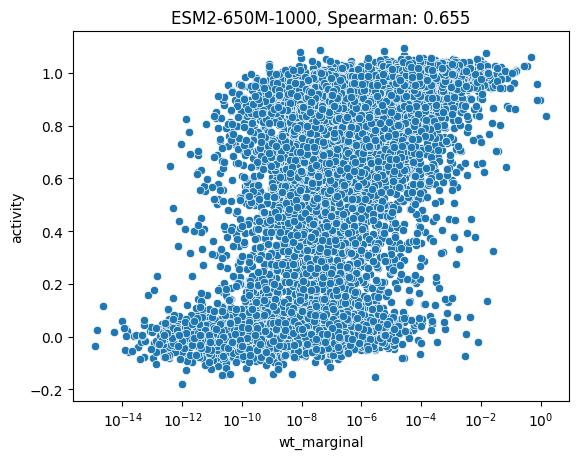

In [74]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/scores_ft650m1000-0227_epochs=1.csv')
frozen_scores['wt_marginal'] = frozen_scores['wt_marginal_score'].apply(lambda x: 10**x)
combined_1000_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')

sns.scatterplot(x='wt_marginal', y='activity', data=combined_1000_df)
plt.xscale('log')
spearman = spearmanr(combined_1000_df.wt_marginal, combined_1000_df.activity)
plt.title(f'ESM2-650M-1000, Spearman: {spearman.correlation:.3f}')

# 1000 Pairs, high LR

Text(0.5, 1.0, 'ESM2-650M-1000-highLR, Spearman: 0.472')

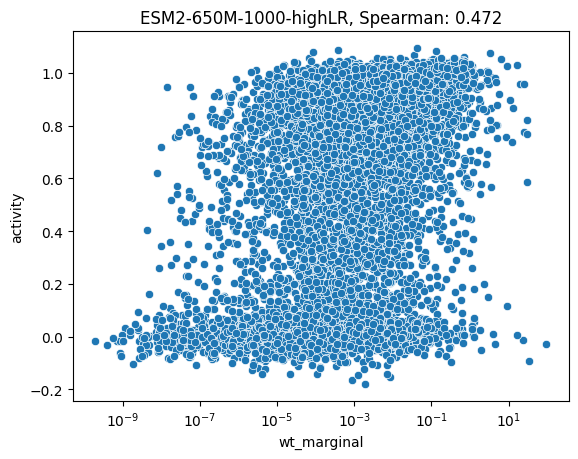

In [75]:
from scipy.stats import spearmanr
import seaborn as sns
from matplotlib import pyplot as plt

# Load in fine=tuned predictions.
frozen_scores = pd.read_csv('notebooks/finetuning_results/scores_ft650m1000-0227_epochs=1_learningrate=0.0001.csv')
frozen_scores['wt_marginal'] = frozen_scores['wt_marginal_score'].apply(lambda x: 10**x)
combined_1000hlr_df = pd.merge(rubisco_activity, frozen_scores, on='seq_id', how='inner')

sns.scatterplot(x='wt_marginal', y='activity', data=combined_1000_df)
plt.xscale('log')
spearman = spearmanr(combined_1000_df.wt_marginal, combined_1000_df.activity)
plt.title(f'ESM2-650M-1000-highLR, Spearman: {spearman.correlation:.3f}')

# Compare Enrichment

<Axes: ylabel='activity'>

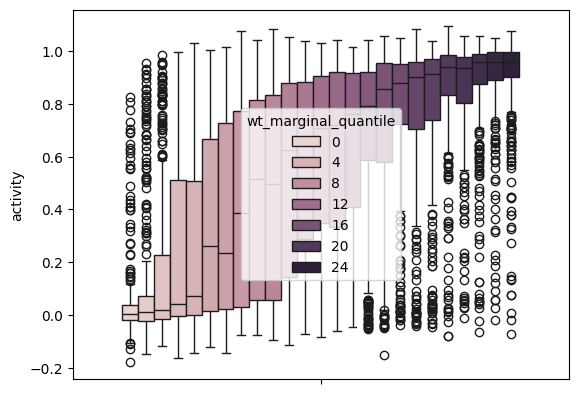

In [66]:
# Compute the quantile of the wt_marginal as an integer 1-10
combined_1000_df['wt_marginal_quantile'] = combined_1000_df['wt_marginal'].rank(pct=True)
combined_1000_df['wt_marginal_quantile'] = combined_1000_df.wt_marginal_quantile.apply(lambda x: int(min(NUM_BUCKETS-1, NUM_BUCKETS * x)))
sns.boxplot(hue='wt_marginal_quantile', y='activity', data=combined_1000_df)

<Axes: ylabel='activity'>

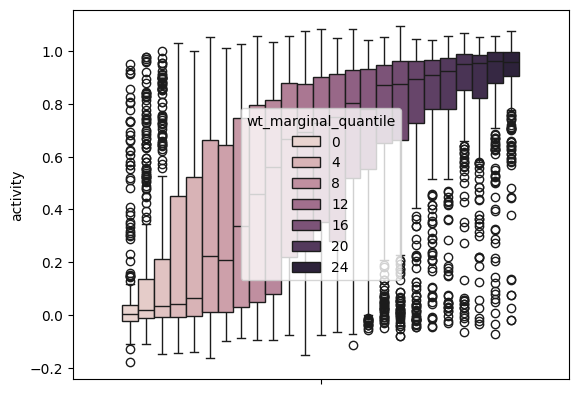

In [65]:
# Compute the quantile of the wt_marginal as an integer 1-10
NUM_BUCKETS = 25
combined_0_df['wt_marginal_quantile'] = combined_0_df['wt_marginal'].rank(pct=True)
combined_0_df['wt_marginal_quantile'] = combined_0_df.wt_marginal_quantile.apply(lambda x: int(min(NUM_BUCKETS-1, NUM_BUCKETS * x)))
sns.boxplot(hue='wt_marginal_quantile', y='activity', data=combined_0_df)

<Axes: ylabel='activity'>

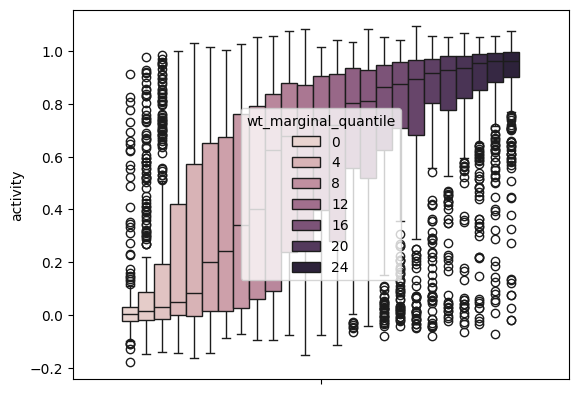

In [70]:
# Compute the quantile of the wt_marginal as an integer 1-10
combined_100_df['wt_marginal_quantile'] = combined_100_df['wt_marginal'].rank(pct=True)
combined_100_df['wt_marginal_quantile'] = combined_100_df.wt_marginal_quantile.apply(lambda x: int(min(NUM_BUCKETS-1, NUM_BUCKETS * x)))
sns.boxplot(hue='wt_marginal_quantile', y='activity', data=combined_100_df)

In [68]:

combined_1000_df[combined_1000_df['wt_marginal_quantile'] == 24].activity.describe()

count    351.000000
mean       0.899681
std        0.185645
min       -0.073007
25%        0.900651
50%        0.959862
75%        0.995046
max        1.074428
Name: activity, dtype: float64

In [72]:
combined_100_df[combined_100_df['wt_marginal_quantile'] == 24].activity.describe()

count    351.000000
mean       0.905022
std        0.177427
min       -0.020335
25%        0.902610
50%        0.960951
75%        0.995046
max        1.074428
Name: activity, dtype: float64

In [71]:
combined_0_df[combined_0_df['wt_marginal_quantile'] == 24].activity.describe()

count    351.000000
mean       0.912395
std        0.164396
min       -0.020335
25%        0.905480
50%        0.959862
75%        0.994759
max        1.074428
Name: activity, dtype: float64

In [5]:
# from app.helpers.finetuning.training import load_esm_model
# model_0226, tokenizer_0226 = load_esm_model('notebooks/data/esm2_650m_1000_0226')
# dms_seq_ids = get_seq_ids_for_deep_mutational_scan(rubisco_wt_aa_seq, ["WT"], [])
# scores_df = score_sequences(model_0226, tokenizer_0226, rubisco_wt_aa_seq, dms_seq_ids)

In [41]:
scores_df['wt_marginal'] = scores_df.wt_marginal_score.apply(lambda x: 10**x)
combined_df = pd.merge(rubisco_activity, scores_df, on='seq_id', how='inner')
spearmanr(combined_df.wt_marginal, combined_df.activity)

SignificanceResult(statistic=0.141388388428402, pvalue=2.371334269325509e-40)

Text(0.5, 1.0, 'ESM2-650M-1000, Spearman: 0.14')

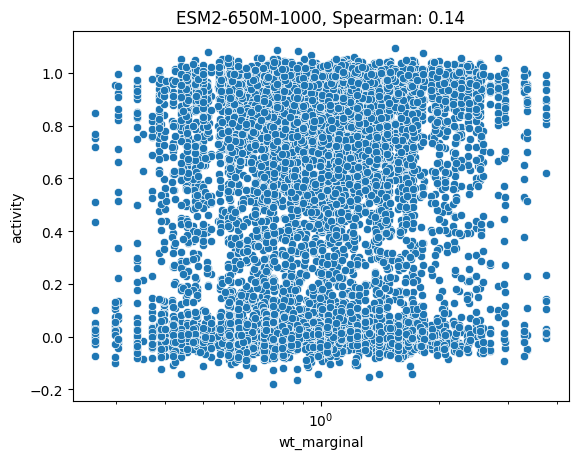

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.scatterplot(x='wt_marginal', y='activity', data=combined_df)
plt.xscale('log')
spearman = spearmanr(combined_df.wt_marginal, combined_df.activity)
plt.title(f'ESM2-650M-1000, Spearman: {spearman.correlation:.2f}')